In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [31]:
data_dir = Path('../data/full/test')
output_15_dir = Path('../../cross-domain-disen-sona/test/resnet_model_no_grl/images/')
output_50_dir = Path('../../cross-domain-disen-sona/test/resnet_model_no_grl_50_epoch/images/')

In [10]:
!ls ../../cross-domain-disen-sona/test/resnet_model_no_grl_50_epoch/images/ | grep scale | head -n 15

basement_0001a_0055_scale-auto_outputsX.png
basement_0001a_0055_scale-auto_outputsY.png
basement_0001a_0055_scale-im_swapped_X.png
basement_0001a_0055_scale-im_swapped_Y.png
basement_0001a_0055_scale-inputsX.png
basement_0001a_0055_scale-inputsY.png
basement_0001a_0055_scale-outputsX2Y.png
basement_0001a_0055_scale-outputsX2Yp.png
basement_0001a_0055_scale-outputsY2X.png
basement_0001a_0055_scale-outputsY2Xp.png
basement_0001a_0055_scale-sel_auto_X.png
basement_0001a_0055_scale-sel_auto_Y.png
basement_0001a_0067_scale-auto_outputsX.png
basement_0001a_0067_scale-auto_outputsY.png
basement_0001a_0067_scale-im_swapped_X.png
grep: write error
ls: write error: Broken pipe


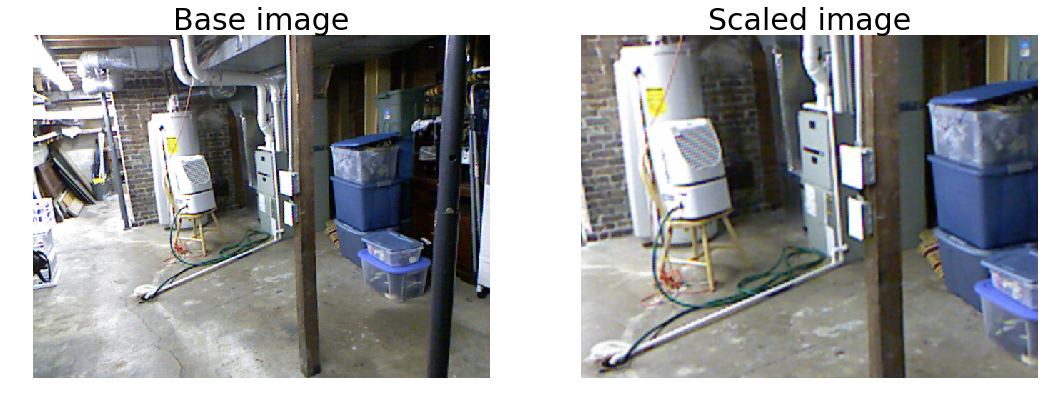

In [6]:
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.imshow(imageio.imread(data_dir/'basement_0001a_0021.png')[:, :640, :])
plt.axis('off')
plt.title('Base image', fontsize=30)

plt.subplot(122)
plt.imshow(imageio.imread(data_dir/'basement_0001a_0021_scale.png')[:, :640, :])
plt.axis('off')
plt.title('Scaled image', fontsize=30)
# plt.tight_layout()
plt.savefig('./comparison.png')

In [ ]:
plt.figure(figsize=(27, 7))

plt.subplot(131)
plt.imshow(imageio.imread(data_dir/'basement_0001a_0021.png')[:, :640, :])
plt.axis('off')
plt.title('Base image', fontsize=30)

plt.subplot(132)
plt.imshow(imageio.imread(data_dir/'basement_0001a_0021_scale.png')[:, :640, :])
plt.axis('off')
plt.title('Scaled image', fontsize=30)

plt.subplot(133)
plt.imshow(imageio.imread(data_dir/))

plt.savefig('./comparison.png')

In [60]:
def plot_output(fname, save=False):
    plt.figure(figsize=(36, 7))
    
    input_img = imageio.imread(data_dir/(fname + '.png'))
    pred_15 = Image.open(output_15_dir/(fname + '-outputsX2Y.png')).resize((640, 480))
    pred_50 = Image.open(output_50_dir/(fname + '-outputsX2Y.png')).resize((640, 480))
    
    # input image
    plt.subplot(141)
    plt.imshow(input_img[:, :640, :])
    plt.axis('off')
    plt.title('Input image', fontsize=30)
    
    # target depth map
    plt.subplot(142)
    plt.imshow(input_img[:, 640:, :])
    plt.axis('off')
    plt.title('Target depth map', fontsize=30)
    
    # predicted depth map, 15 epochs
    plt.subplot(143)
    plt.imshow(pred_15)
    plt.axis('off')
    plt.title('Predicted depth map (15 epochs)', fontsize=30)
    
    # predicted depth map, 50 epochs
    plt.subplot(144)
    plt.imshow(pred_50)
    plt.axis('off')
    plt.title('Predicted depth map (50 epochs)', fontsize=30)

    plt.tight_layout()
    if save:
        plt.savefig(fname + '_output.png')

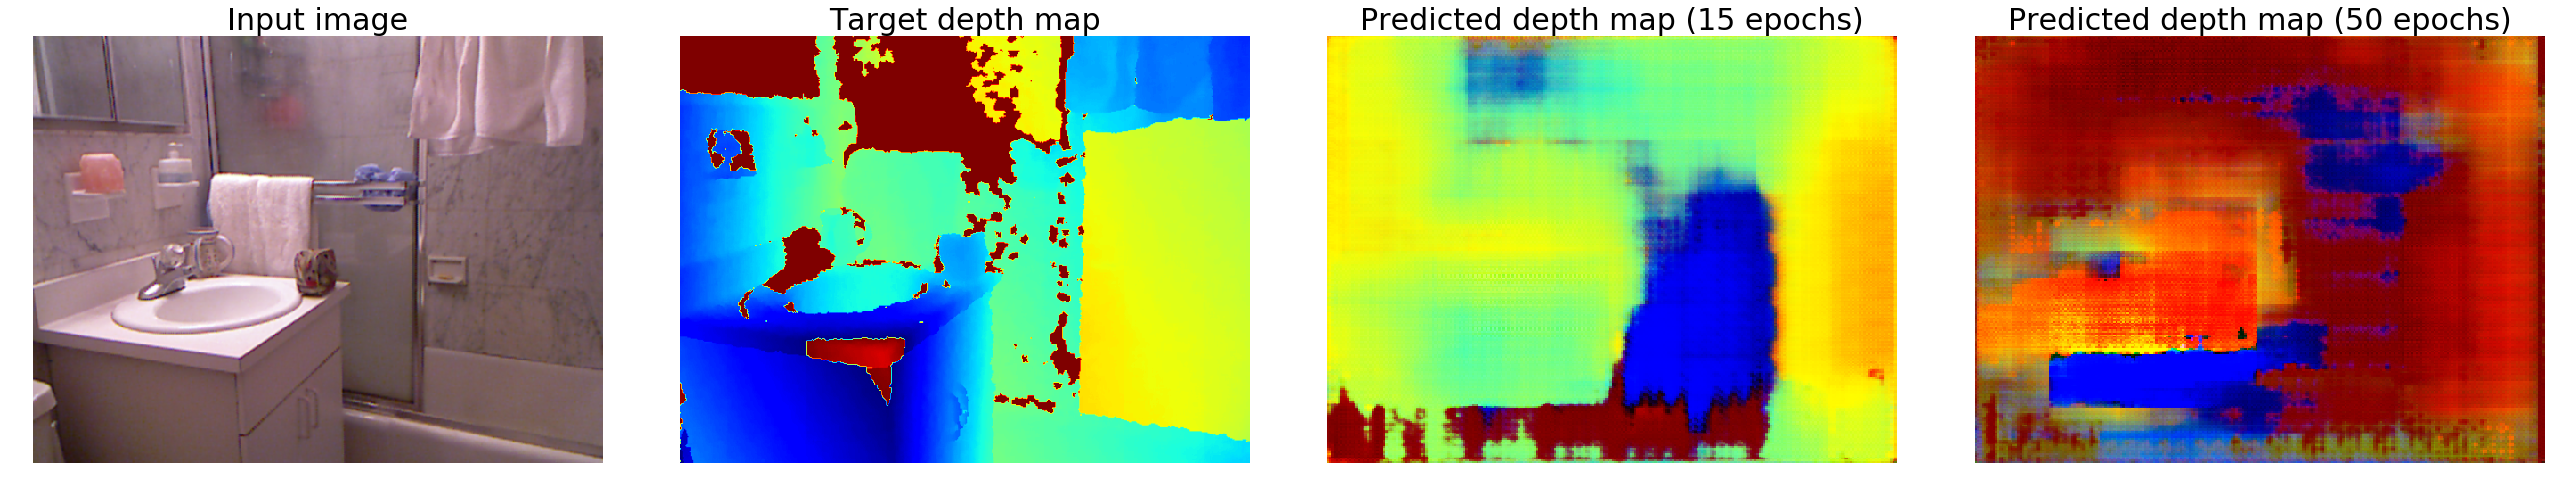

In [61]:
plot_output('bathroom_0003_0051_scale')

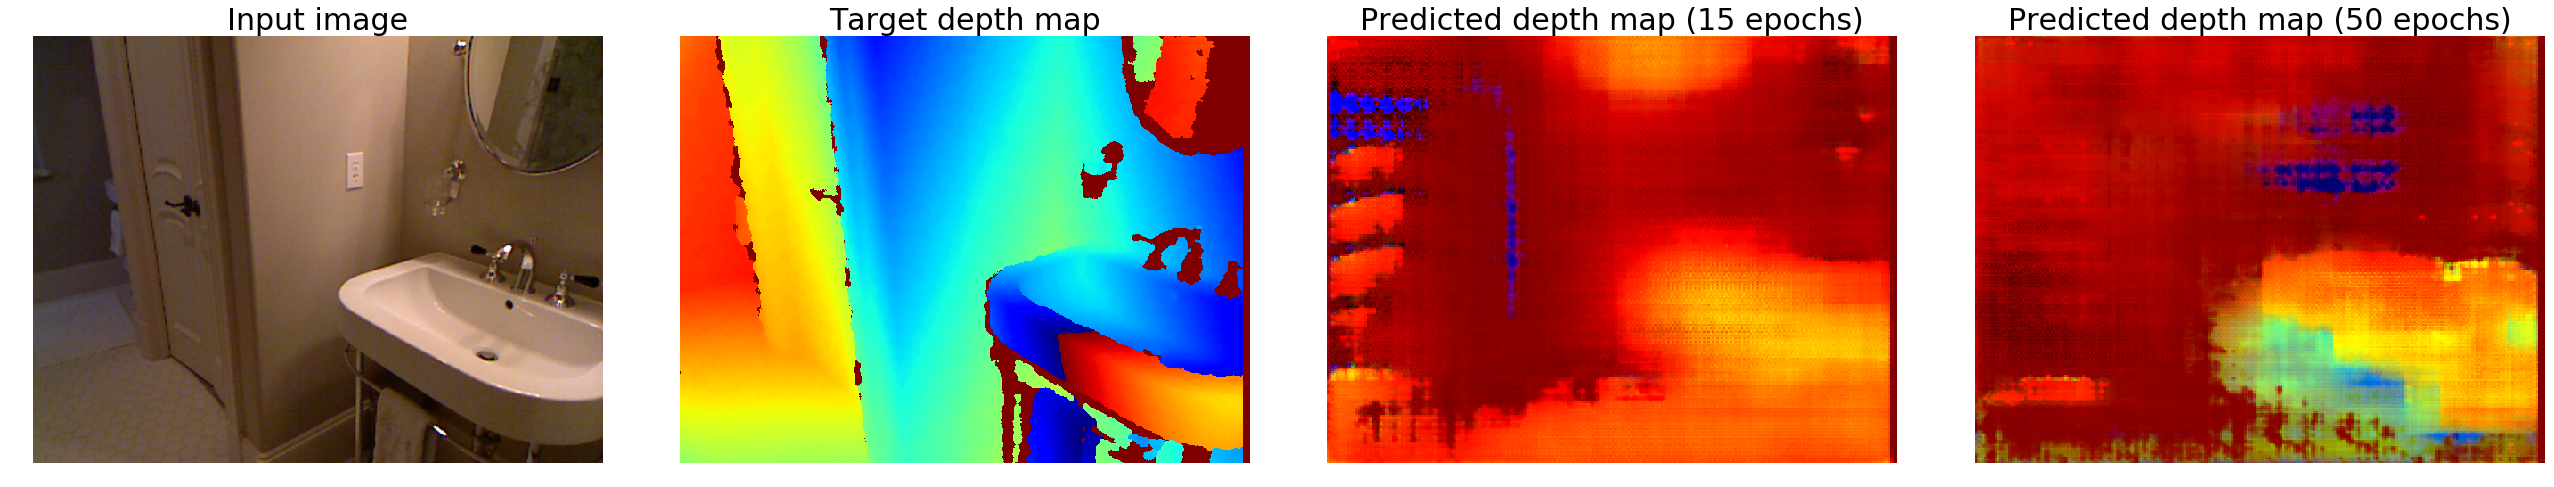

In [62]:
plot_output('bathroom_0015_0012', save=True)

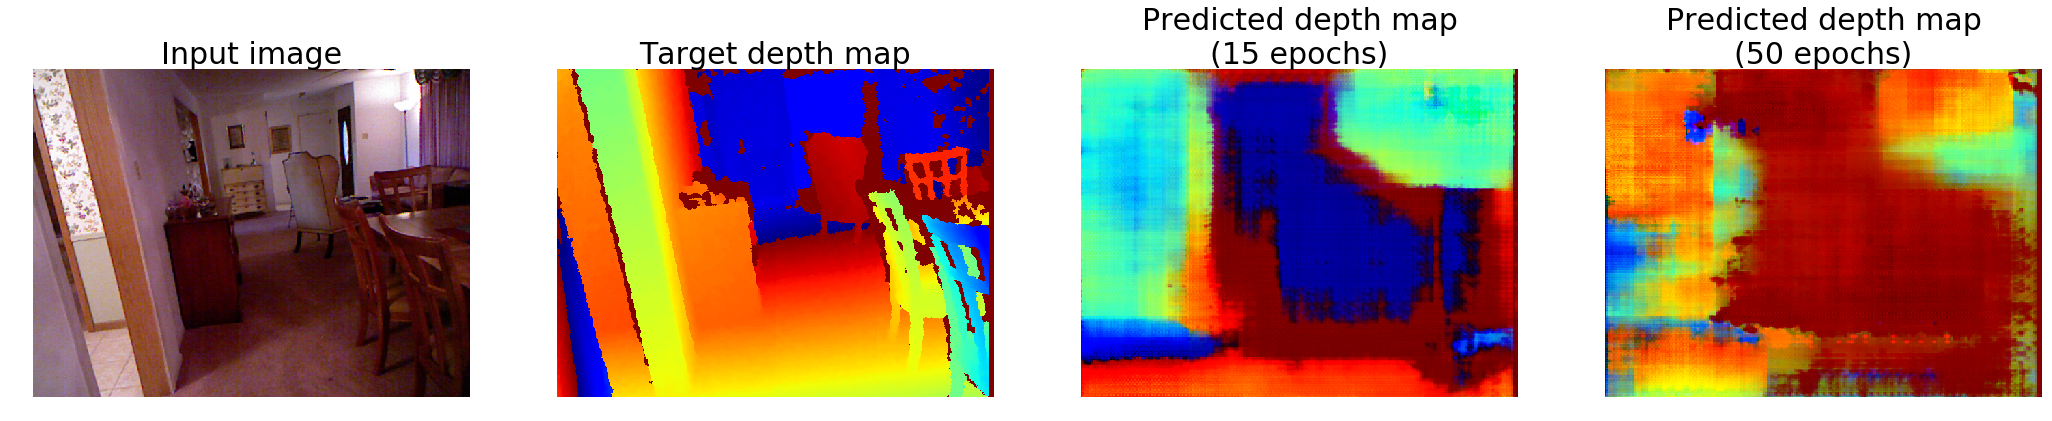

In [34]:
plot_output('dining_room_0001a_0013')

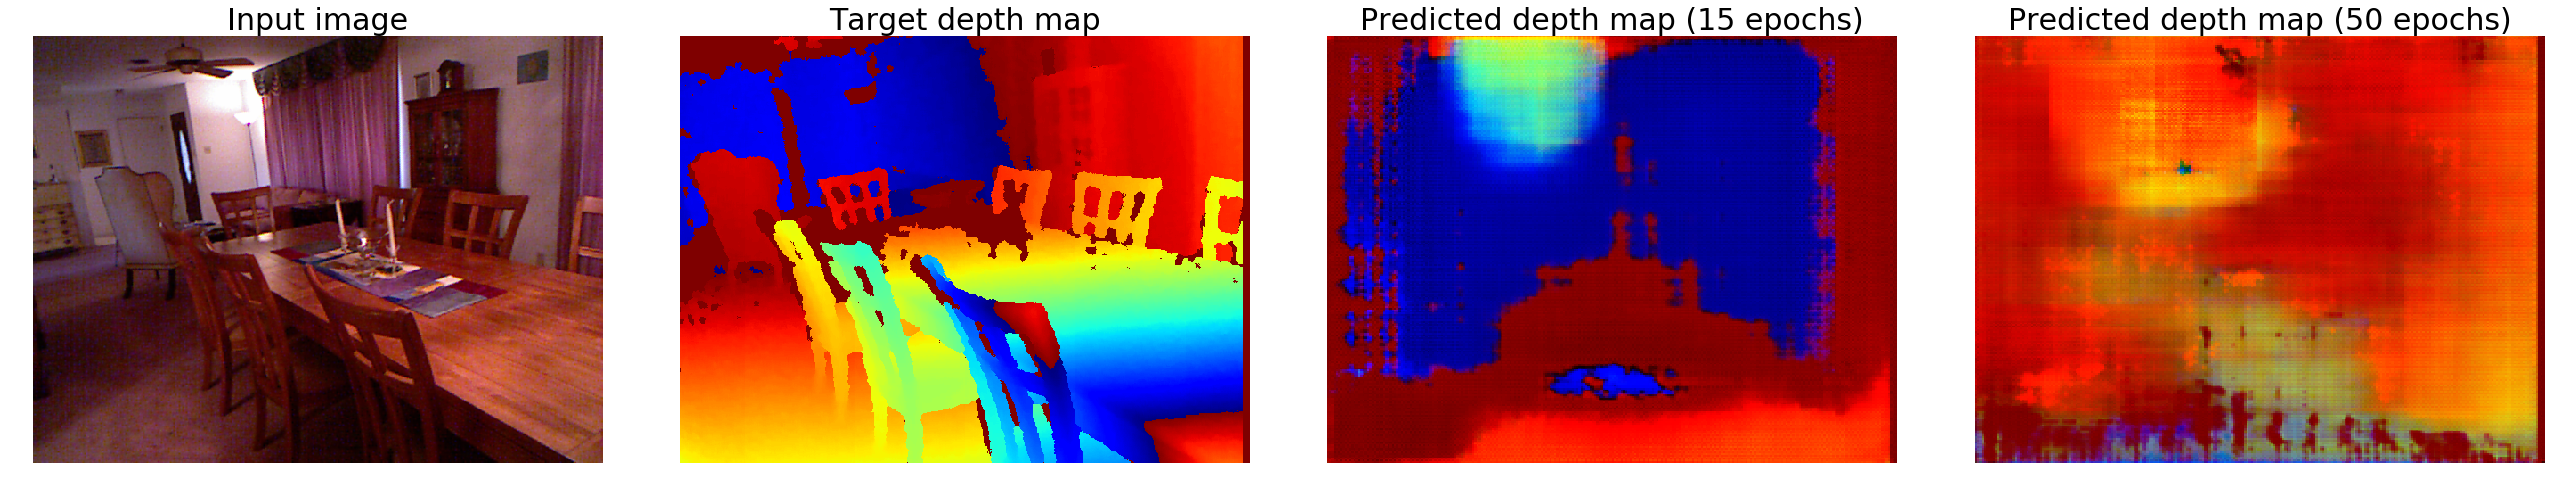

In [67]:
plot_output('bedroom_0068_0076')

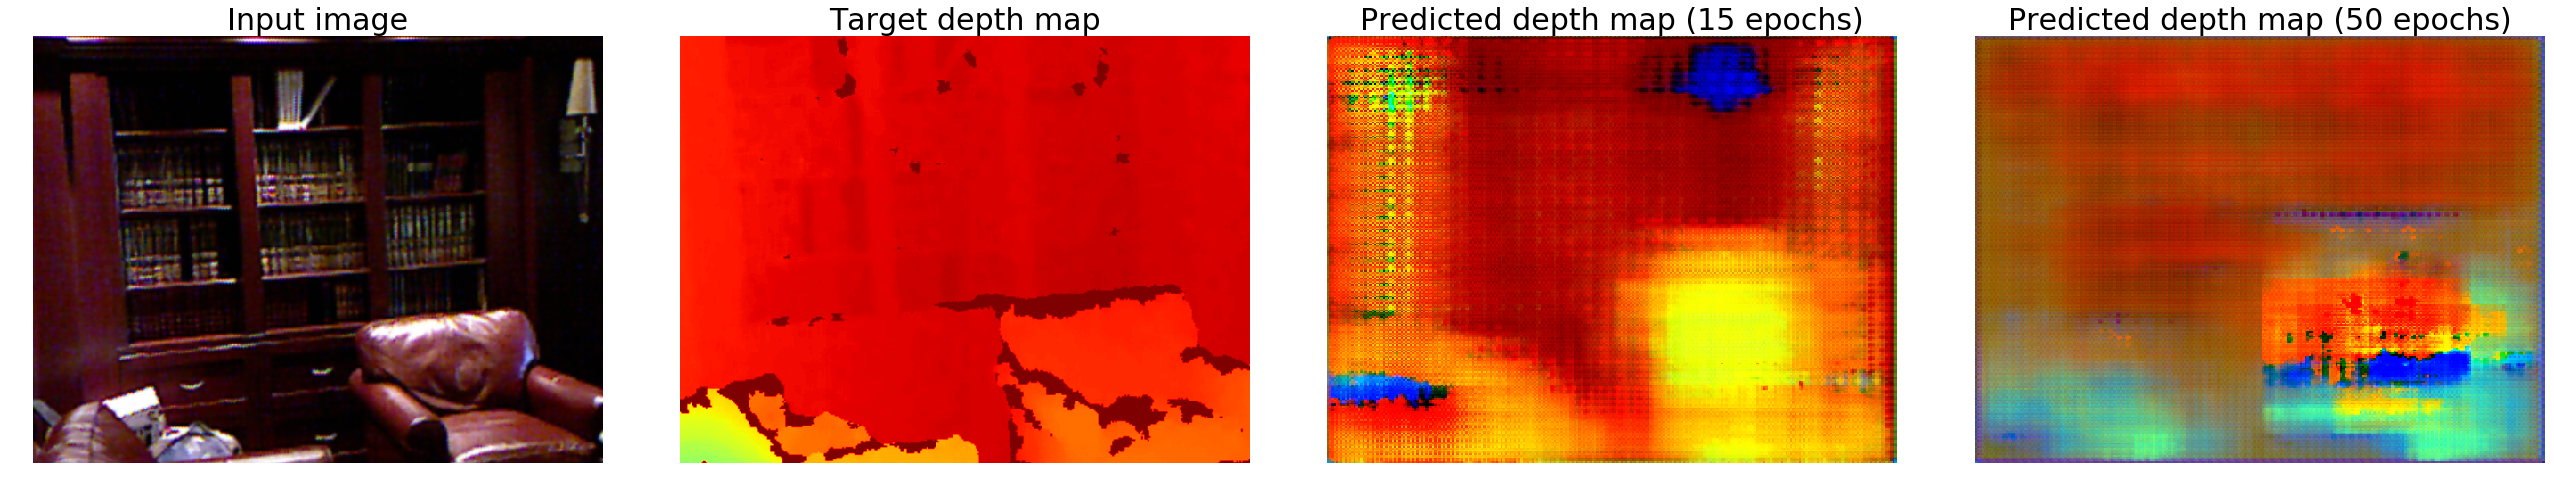

In [65]:
plot_output('home_office_0008_0015_scale', save=True)

In [59]:
def plot_images(i, d, idx):
    rgb = imageio.imread(i[idx])
    depth = imageio.imread(d[idx])
    plt.figure(figsize=(18, 14))
    plt.subplot(121)
    plt.imshow(rgb)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(convert_depth(depth))
    plt.axis('off');

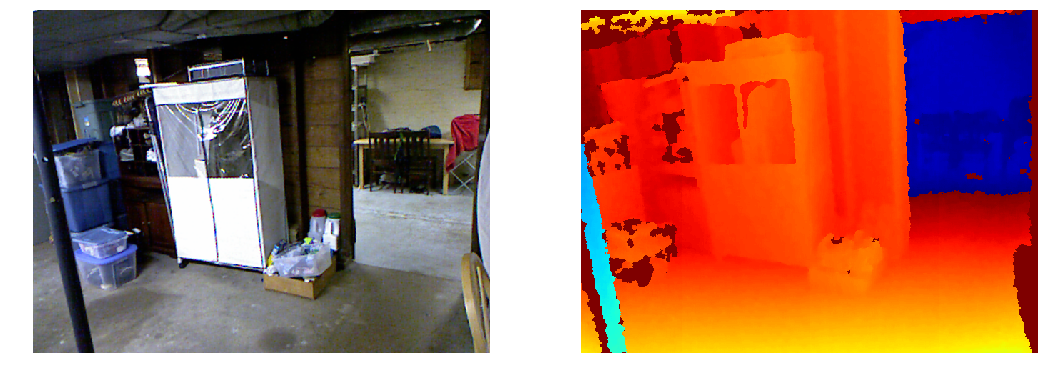

In [70]:
plot_images(b1a_imgs, b1a_depths, 0)

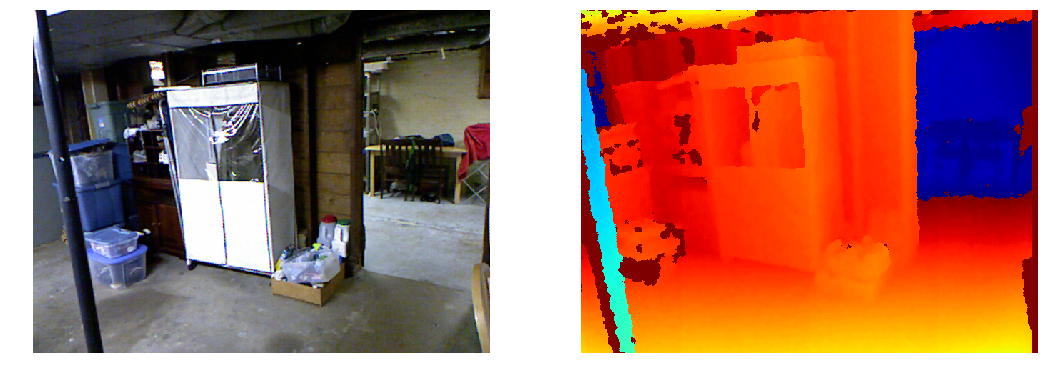

In [71]:
plot_images(b1a_imgs, b1a_depths, 10)

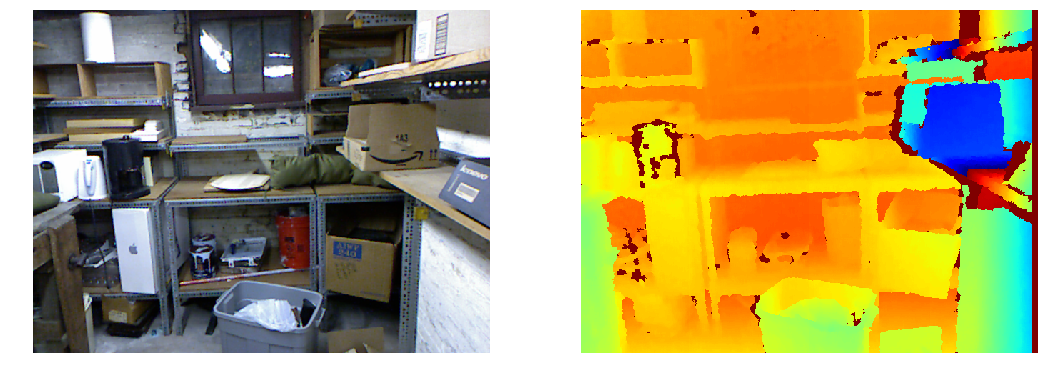

In [72]:
plot_images(b1b_imgs, b1b_depths, 0)

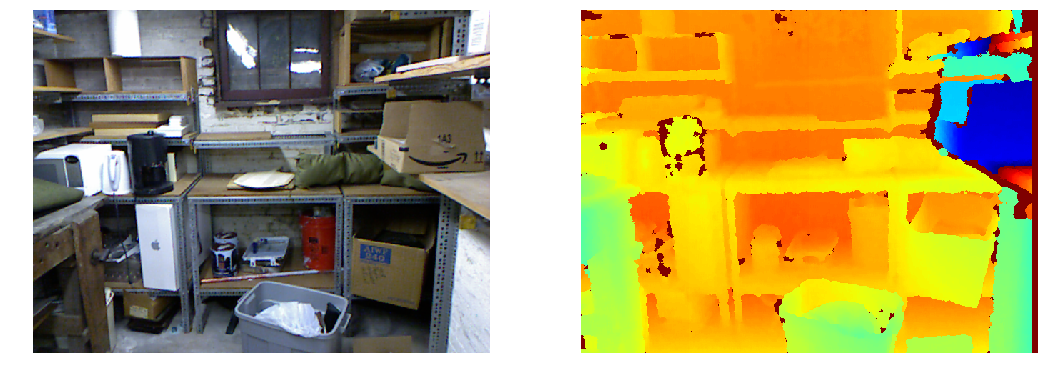

In [73]:
plot_images(b1b_imgs, b1b_depths, 15)

In [20]:
!ls ../../cross-domain-disen-sona/test/resnet_model_no_grl/images/ | head -n 20

basement_0001a_0003-auto_outputsX.png
basement_0001a_0003-auto_outputsY.png
basement_0001a_0003-im_swapped_X.png
basement_0001a_0003-im_swapped_Y.png
basement_0001a_0003-inputsX.png
basement_0001a_0003-inputsY.png
basement_0001a_0003-outputsX2Y.png
basement_0001a_0003-outputsX2Yp.png
basement_0001a_0003-outputsY2X.png
basement_0001a_0003-outputsY2Xp.png
basement_0001a_0003-sel_auto_X.png
basement_0001a_0003-sel_auto_Y.png
basement_0001a_0012-auto_outputsX.png
basement_0001a_0012-auto_outputsY.png
basement_0001a_0012-im_swapped_X.png
basement_0001a_0012-im_swapped_Y.png
basement_0001a_0012-inputsX.png
basement_0001a_0012-inputsY.png
basement_0001a_0012-outputsX2Y.png
basement_0001a_0012-outputsX2Yp.png
ls: write error: Broken pipe


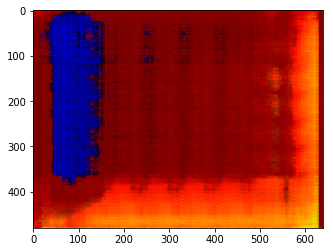

In [34]:
pred = Image.open('../../cross-domain-disen-sona/test/resnet_model_no_grl/images/basement_0001a_0003-im_swapped_Y.png')
pred_resize = pred.resize((640, 480))
plt.imshow(pred_resize)
pred_resize.save('../data/resize_pred.png')